In [1]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

# get values for some physical parameters
b = SL.b
g = SL.g
rhoi = SL.rhoi
rhow = SL.rhow

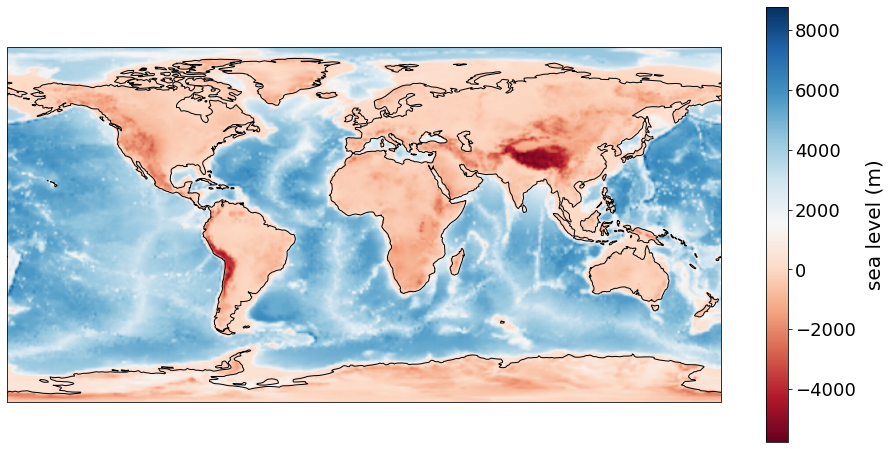

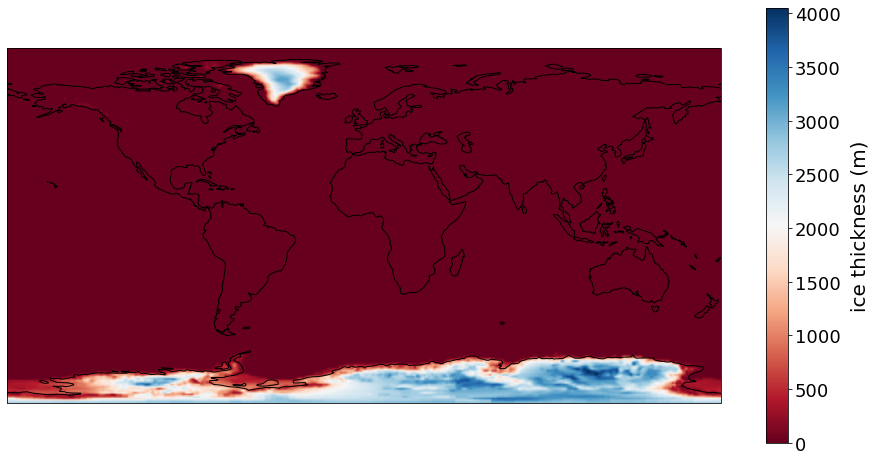

fraction of surface which is ocean =  0.712960233719624


In [3]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)')

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

# work out the ocean area and check the value
A = SL.surface_integral(C)
A_earth = 4*pi*b**2
print('fraction of surface which is ocean = ',A/A_earth)

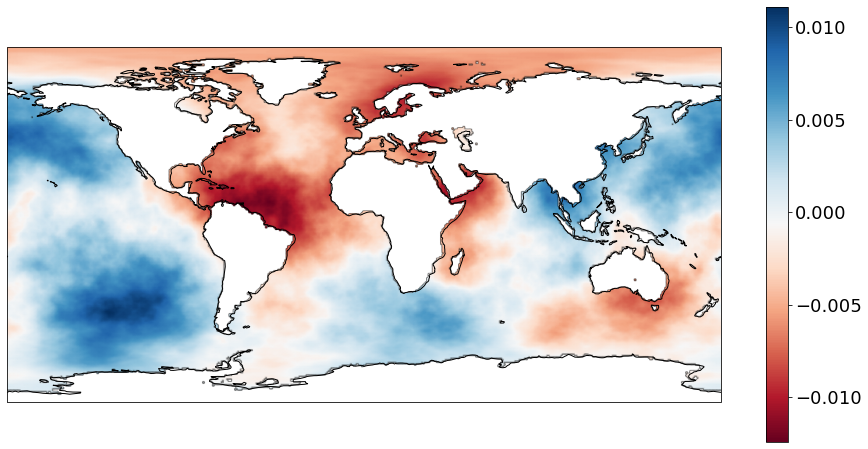

iteration =  1 relative change =  0.19225304746982944
iteration =  2 relative change =  0.040829150640079685
iteration =  3 relative change =  0.008872035310208028
iteration =  4 relative change =  0.0019651622078507703
iteration =  5 relative change =  0.0004503741107215375
iteration =  6 relative change =  0.00010824122586076754
iteration =  7 relative change =  2.747170083468585e-05
iteration =  8 relative change =  7.370293870491572e-06
iteration =  9 relative change =  2.0786147753479347e-06
iteration =  10 relative change =  6.136194568245234e-07
iteration =  11 relative change =  1.8851919415174663e-07
iteration =  12 relative change =  5.962302310662323e-08
iteration =  13 relative change =  1.9010427371303884e-08
iteration =  14 relative change =  6.093307313212978e-09


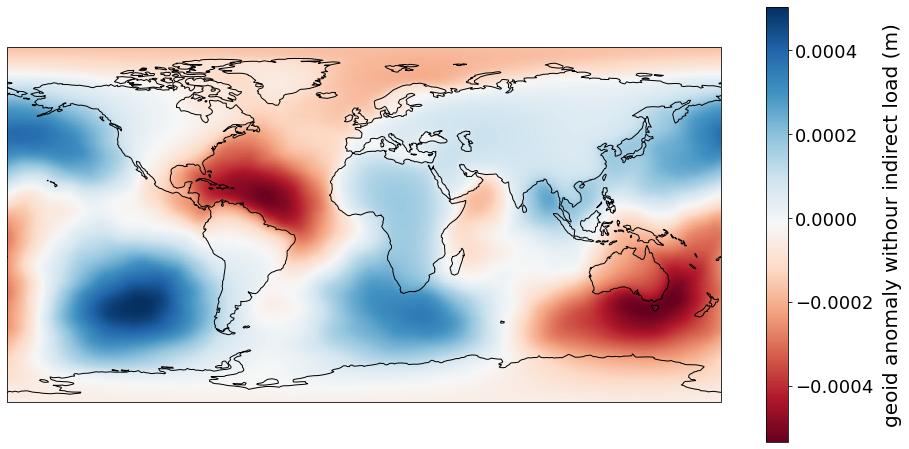

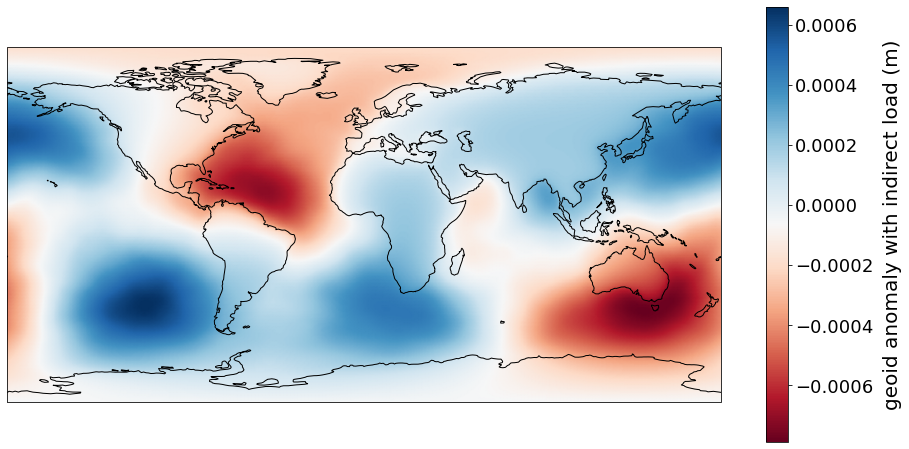

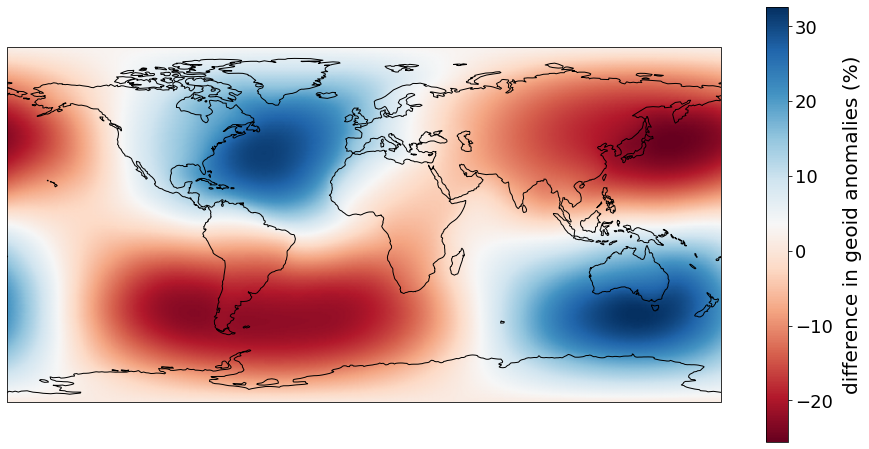

GRACE average of load =  -0.000816727311221874
true average of load  =  0.000639077649655748
relative difference   =  -227.79782107257554 %
iteration =  1 relative change =  0.026466196293023835
iteration =  2 relative change =  0.0010263956614982965
iteration =  3 relative change =  6.985963357128465e-05
iteration =  4 relative change =  8.461493188012874e-06
iteration =  5 relative change =  1.5317579561005958e-06
iteration =  6 relative change =  3.5056393649657393e-07
iteration =  7 relative change =  8.793257187879033e-08
iteration =  8 relative change =  2.3354482182629316e-08
iteration =  9 relative change =  6.488576776816311e-09


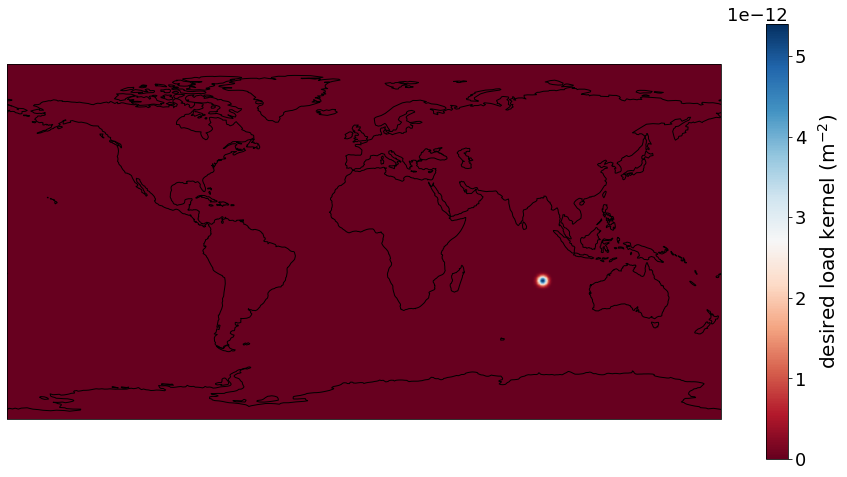

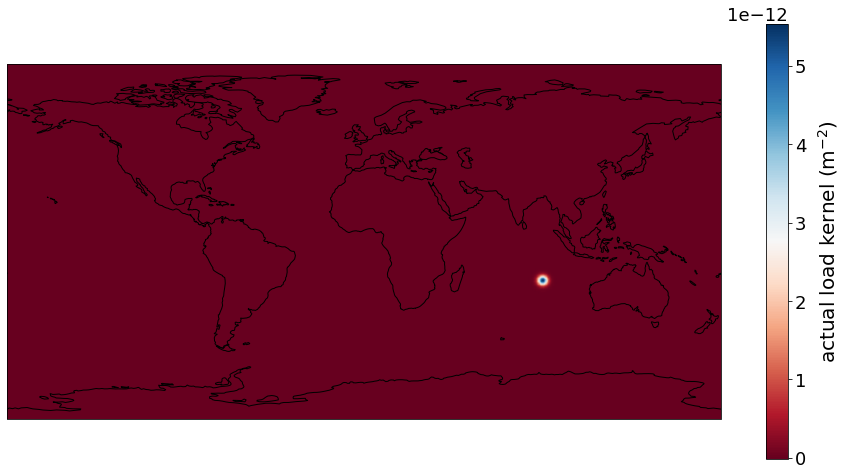

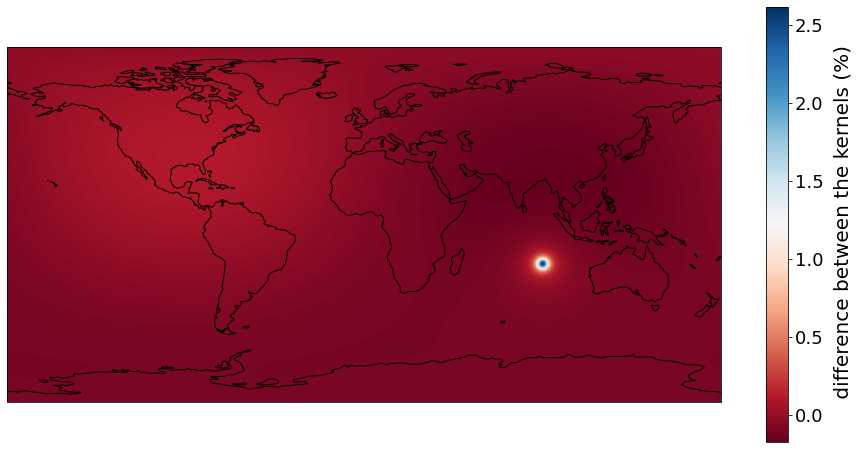

GRACE average of load =  -0.0007612845203400604
true average of load  =  0.0006651554833369857
relative difference   =  -214.45211524391408 %
iteration =  1 relative change =  0.06932049435085015
iteration =  2 relative change =  0.00616916798846091
iteration =  3 relative change =  0.0007381707130823072
iteration =  4 relative change =  0.00011700677730294485
iteration =  5 relative change =  2.3280181683138078e-05
iteration =  6 relative change =  5.3863836242575324e-06
iteration =  7 relative change =  1.3535613720069504e-06
iteration =  8 relative change =  3.597634117153454e-07
iteration =  9 relative change =  9.999022087941151e-08
iteration =  10 relative change =  2.932283257680523e-08
iteration =  11 relative change =  8.866137464447555e-09


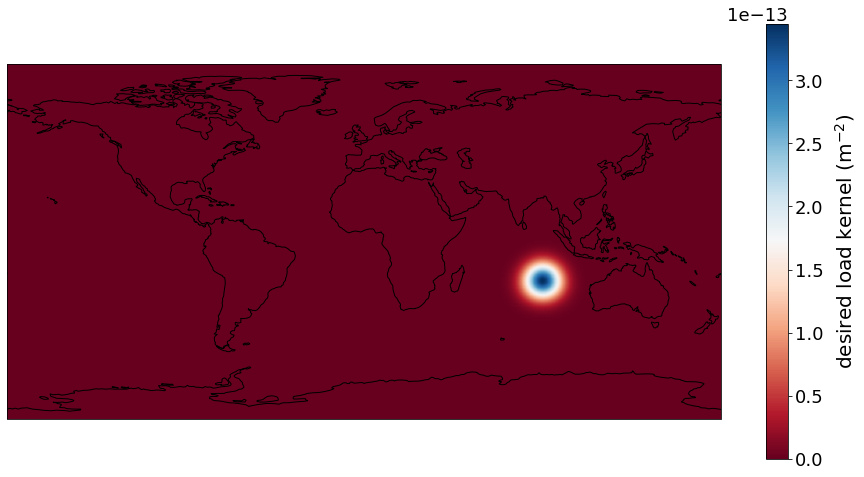

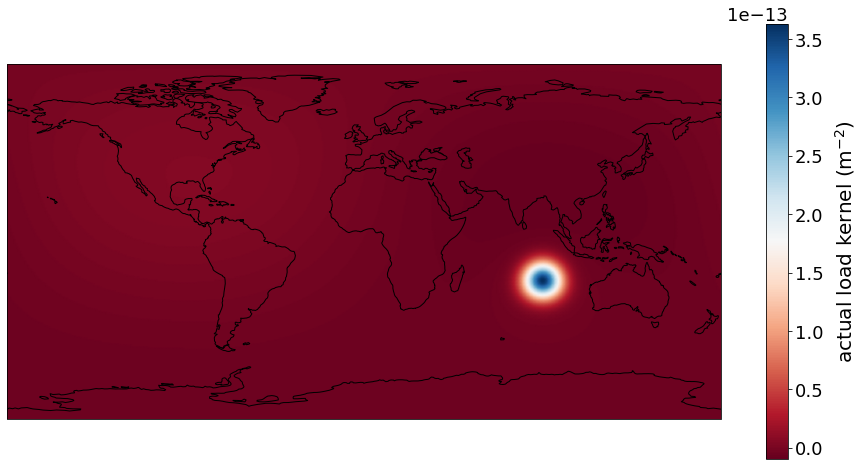

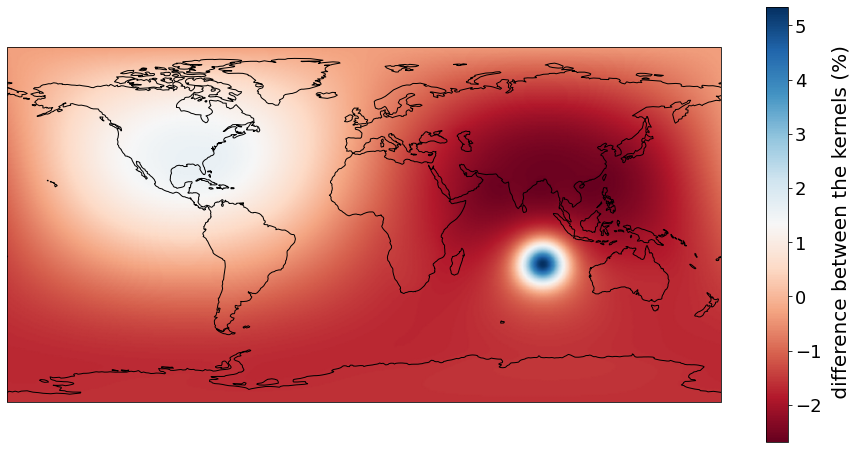

In [5]:
# make a random ocean load
ocean_mask = SL.ocean_mask(sl0,ice0)
Q = SL.sobolev_covariance(L,std = 0.01,s = 2,mu = 1.)
zeta_dyn = SL.random_ocean_load(C,Q)
sl_dyn = zeta_dyn/SL.rhow
SL.plot(ocean_mask*sl_dyn)

# compute the simplified response
_,phi_dir = SL.loading_response(zeta_dyn)


# compute the response
g = SL.g
sl_hyd,u_hyd,phi_hyd,om_hyd,psi_hyd = SL.fingerprint(C,zeta_dyn)
SL.plot(-(1/g)*phi_dir,label = r'geoid anomaly withour indirect load (m)')
SL.plot(-(1/g)*phi_hyd,label = r'geoid anomaly with indirect load (m)')
norm = np.max(np.abs(phi_hyd.data))
SL.plot(100*(phi_hyd-phi_dir)/norm,label = 'difference in geoid anomalies (%)')


# set the averaging function
w = SL.gaussian_averaging_function(L,r = 200,lat0 = -20.,lon0 = 90.)

# compute the true and GRACE average
true_average = SL.surface_integral(w*zeta_dyn)/SL.rhow
GRACE_average = SL.GRACE_average_measurement(phi_hyd,w,LT = 0)/SL.rhow

print('GRACE average of load = ',GRACE_average)
print('true average of load  = ',true_average)
print('relative difference   = ',100*(GRACE_average-true_average)/true_average,'%')

# form the adjoint loads
zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.GRACE_average_load(w,LT = 0)

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)


# plot the kernel wrt zeta
SL.plot(w,label = r'desired load kernel (m$^{-2}$)')
SL.plot(sl_d,label = r'actual load kernel (m$^{-2}$)')

# plot the kernel wrt zeta
norm = np.max(np.abs(w.data[:,:]))
SL.plot(100*(sl_d-w)/norm,label = ' difference between the kernels (%)')


##########################################################
# now again with a wider average

# set the averaging function
w = SL.gaussian_averaging_function(L,r = 800,lat0 = -20.,lon0 = 90.)

# compute the true and GRACE average
true_average = SL.surface_integral(w*zeta_dyn)/SL.rhow
GRACE_average = SL.GRACE_average_measurement(phi_hyd,w,LT = 0)/SL.rhow

print('GRACE average of load = ',GRACE_average)
print('true average of load  = ',true_average)
print('relative difference   = ',100*(GRACE_average-true_average)/true_average,'%')

# form the adjoint loads
zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.GRACE_average_load(w,LT = 0)

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)


# plot the kernel wrt zeta
SL.plot(w,label = r'desired load kernel (m$^{-2}$)')
SL.plot(sl_d,label = r'actual load kernel (m$^{-2}$)')

# plot the kernel wrt zeta
norm = np.max(np.abs(w.data[:,:]))
SL.plot(100*(sl_d-w)/norm,label = ' difference between the kernels (%)')

